In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob>=0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')
    
def plot_prob(x):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', color='gray')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend
    
    plt.show()

### 6.1 베르누이 분포

$f(x)=
\begin{cases}
p^x(1-p)^{(1-x)}\;\;\;(x\in\{0,1\})\\
0\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(otherwise)
\end{cases}$

$X\sim Bern(p)라고\;할\;때\\
E(X)=p,\;\;\;\;\;V(X)=p(1-p)$

In [4]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else:
            return 0
    return x_set, f

In [7]:
p = 0.3
X = Bern(p)
check_prob(X)

expected value 0.3
variance 0.21


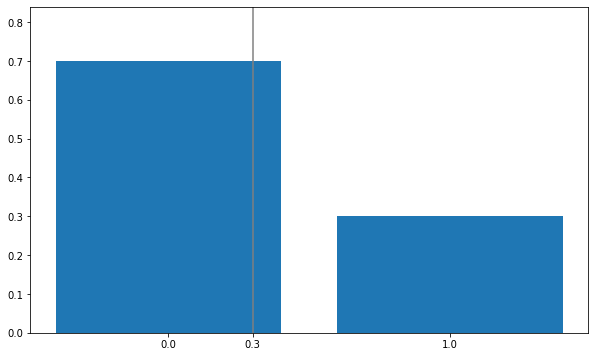

In [10]:
plot_prob(X)

In [11]:
rv = stats.bernoulli(p)

In [12]:
# 확률함수
rv.pmf(0), rv.pmf(1)

(0.7, 0.3)

In [13]:
rv.pmf([0, 1])

array([0.7, 0.3])

In [14]:
# 누적밀도함수
rv.cdf([0,1])

array([0.7, 1. ])

In [15]:
rv.mean(), rv.var()

(0.3, 0.21)

### 6.2 이항분포

$f(x)=
\begin{cases}
\frac{n!}{x!(n-x)!}p^x(1-p)^{(n-x)}\;\;\;(x\in\{0,1,\dots,n\})\\
0\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(otherwise)
\end{cases}$

$X\sim B(n,p)라고\;할\;때\\
E(X)=np, \;\;\;\;\;V(X)=np(1-p)$

In [4]:
from scipy.special import comb

def B(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [5]:
# B(10, 0.3)
n = 10
p = 0.3
X = B(n,p)
check_prob(X)

expected value 3.0
variance 2.1


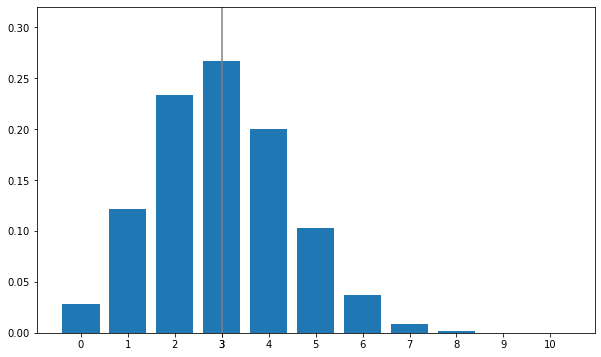

In [6]:
plot_prob(X)

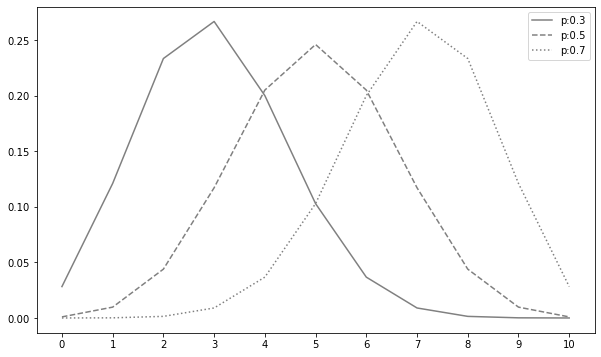

In [7]:
# p가 0.3, 0.5, 0.7일 때의 이항분포

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
x_set = np.arange(n+1)

for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}', ls=ls, color='gray')
    
ax.set_xticks(x_set)
ax.legend()
plt.show()

### 6.3 기하분포

$f(x)=
\begin{cases}
(1-p)^{(x-1)}p\;\;\;(x\in\{1,2,3,\dots\})\\
0\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;(otherwise)
\end{cases}$

$X\sim Geo(p)라고 할 때\\
E(X)=\frac{1}{p},\;\;\;\;\;\;V(X)=\frac{(1-p)}{p^2}$

In [8]:
def Geo(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return (1-p)**(x-1) * p
        else:
            return 0
    return x_set, f

In [9]:
# Geo(1/2)
p = 0.5
X = Geo(p)
check_prob(X)

expected value 2.0
variance 2.0


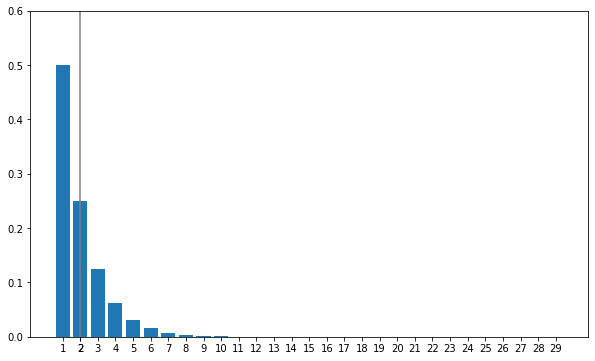

In [10]:
plot_prob(X)

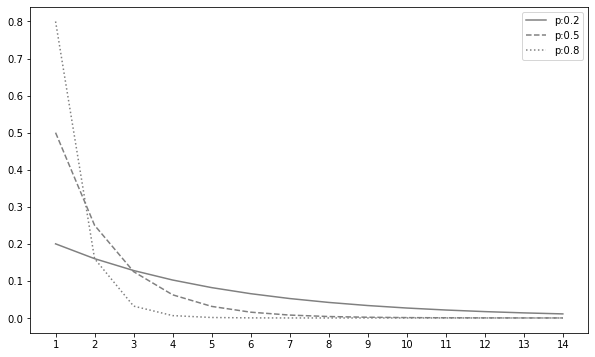

In [11]:
# p가 0.2, 0.5, 0.8일 때의 기하분포 (편의상 1=<x=<14)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(1,15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}', ls=ls, color='gray')

ax.set_xticks(x_set)
ax.legend()
plt.show()

### 6.4 포아송 분포

$f(x)=
\begin{cases}\frac{\lambda^x}{x!}\cdot e^{-\lambda}\;\;\;(x\in\{0,1,2,\dots\})\\
0\;\;\;\;\;\;\;\;\;\;\;\;(otherwise)
\end{cases}$

$X\sim Poi(\lambda)라고\;할\;때\\
E(X)=\lambda,\;\;\;\;V(X)=\lambda$

In [12]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [13]:
# X~Poi(3)
lam = 3
X = Poi(lam)
check_prob(X)

expected value 3.0
variance 3.0


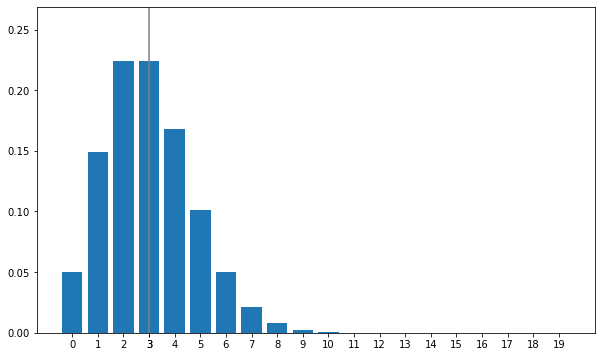

In [14]:
plot_prob(X)

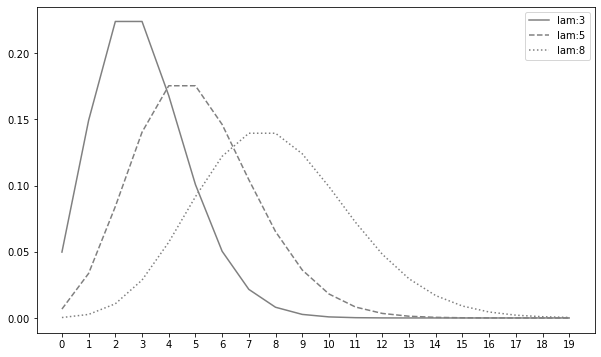

In [15]:
#람다가 3, 5, 8일 때 포아송 분포

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
x_set = np.arange(20)

for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set), label=f'lam:{lam}', ls=ls, color='gray')

ax.set_xticks(x_set)
ax.legend()
plt.show()